In [13]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch.nn.functional import one_hot
from models.CGANModel import Generator

# Prepare pretrained Generator

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

n_classes = 10
z_dim = 100
BATCH_SIZE = 64

print(device)

cuda


In [4]:
G = Generator(n_classes, z_dim, hidden_dim=128)
G = torch.load("weights/CGAN/CGAN3_G_100.pt")
G = G.to(device)
G.eval()

Generator(
  (input_layer): Sequential(
    (0): TransposeConvBlock(
      (layers): Sequential(
        (0): ConvTranspose2d(110, 110, kernel_size=(7, 7), stride=(1, 1))
        (1): BatchNorm2d(110, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (1): TransposeConvBlock(
      (layers): Sequential(
        (0): ConvTranspose2d(110, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
  )
  (hidden_layers): Sequential(
    (0): TransposeConvBlock(
      (layers): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
  

### Generate noise

In [11]:
noise = torch.randn(BATCH_SIZE, z_dim, device="cuda")
noise = noise.view(BATCH_SIZE, z_dim, 1, 1)

### Generate function

In [17]:
def generate_number(number):
    code = one_hot(torch.ones((BATCH_SIZE), dtype=int) * number, num_classes=n_classes).cuda()

    imgs = G(noise, code.view(-1, n_classes, 1, 1))

    img = torchvision.utils.make_grid(imgs)
    img = img.detach().cpu().numpy()
    img = img.transpose((1, 2, 0))

    plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


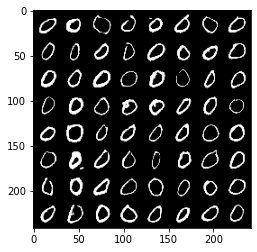

In [18]:
generate_number(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


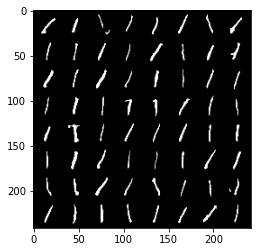

In [19]:
generate_number(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


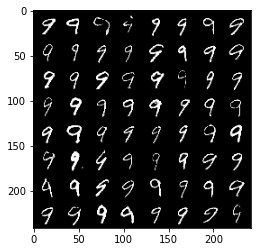

In [20]:
generate_number(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


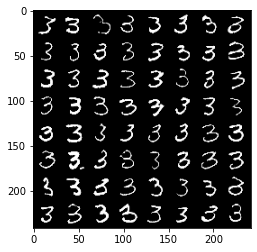

In [21]:
generate_number(3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


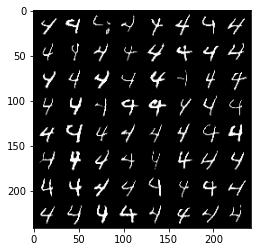

In [22]:
generate_number(4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


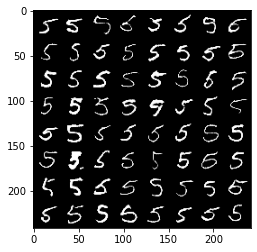

In [23]:
generate_number(5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


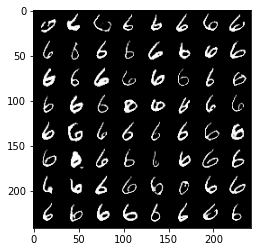

In [24]:
generate_number(6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


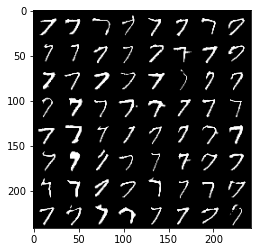

In [25]:
generate_number(7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


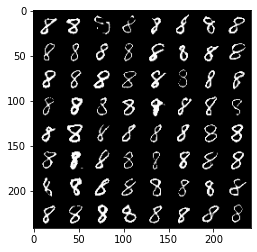

In [26]:
generate_number(8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


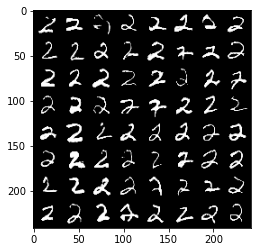

In [27]:
generate_number(9)

# Conclusion

- 나름 잘 만들어진거 같지만 "이상하게" 2 랑 9 랑 바뀌어져서 생성됐다.. 머선일이지..